In [1]:

import random


class State:
    def __init__(self, state):
        #state is a list (solution)
        self.state = state

    #number of attacks
    def evaluation(self):
        h = 0                
        #check for diagonal attacks
        for i in range(0, len(self.state)):
            for j in range(0, len(self.state)):
                if j > i:
                    if abs(i - j) == abs(self.state[i] - self.state[j]):
                       h += 1
                    #Evaluate each column for detecting attacks
                    if abs(self.state[i] - self.state[j]) == 0:
                       h += 1 
        return h
    
    def getCurrentState(self):
        return self.state
    
    def neighbor(self): #returns the best neighbor
        # Dictionary with all possible solution for each queen
        neighbors = {}
        #print(self.state)
        for i in range(0, len(self.state)):
            #print(i)
            for j in range(0, len(self.state)):
                #print("%d %d" % (i,j))
                if j != self.state[i]:
                    temp = self.state.copy()
                    temp[i] = j
                    #Generate a new solution list (state)
                    temp = State(temp)                    
                    #print(temp.getCurrentState())
                    #Evaluate the number of attacks (heuristic) for each new state
                    neighbors[(i, j)] = temp.evaluation() #list of neighbors' evaluation value
        
        best_neighbors = {} #Store the best heuristic
        best_h = self.evaluation() #assign current state evaluation to the best evaluation
        
        #Iterate dict itens (i,j)
        # Where i is the key and h the value (number of attacks)
        for i, h in neighbors.items():
            #check if there is a better state than the current state
            if h < best_h: 
                best_h = h
                if len(best_neighbors) > 0:
                  best_neighbors.popitem()
                best_neighbors[i] = best_h
            if h == best_h:                
                best_neighbors[i] = best_h

        #if there are more than one better solution then choose one of them randomly
        # It is also possible to choose in a greedy way
        if len(best_neighbors.keys()) > 0: 
            random_index = random.randint(0, len(best_neighbors.keys()) - 1)
            list_neighbors = list(best_neighbors.keys())
            self.state[list_neighbors[random_index][0]] = list_neighbors[random_index][1]

        return State(self.state) 

In [2]:

from  random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#board graphic based on the solution
def board(solution): 
    matrix = np.zeros([8,8], dtype=int)
    matrix = matrix.tolist()
    for item in solution:
        for i in range(len(solution)):
            if i == item:
                for j in range(len(solution)):
                    if  j == solution.index(item):
                        matrix[i][j] = 1
                        
    l =[]
    for i in range(1, len(solution)+1):
        l.append(i)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, linewidths=.8,cbar=False,cmap='Set3',xticklabels=l,yticklabels=l)
   


def hill_climbing(initial_state):
    current_state = State(initial_state)
    print("Before: %d" % current_state.evaluation())
    print(current_state.getCurrentState())
    while True:
        best_neighbor = current_state.neighbor()        
        if best_neighbor.evaluation() >= current_state.evaluation():
            print("After: %d" % current_state.evaluation())
            print(current_state.getCurrentState())
            return current_state
        current_state = best_neighbor       
        
    print("After: %d" % current_state.evaluation())
    print(current_state.getCurrentState())    
    return current_state

def random_restart(initial_state):
    state = State(initial_state)
    count = 0
    while State(initial_state).evaluation() > 0 & count < 15:
        #Shuffle the solution (generate a new state)
        shuffle(initial_state)
        state = hill_climbing(initial_state)
        count += 1        
    return state

def simple_hill_climbing(initial_state):
    state = State(initial_state)
    count = 0
    while State(initial_state).evaluation() > 0 & count < 10:        
        state = hill_climbing(initial_state)
        initial_state = state.getCurrentState()
        count += 1        
    return state



Before: 5
[2, 7, 3, 0, 7, 5, 2, 1]
After: 3
[2, 0, 3, 0, 7, 5, 2, 1]
Before: 3
[2, 0, 3, 0, 7, 5, 2, 1]
After: 2
[2, 0, 3, 0, 7, 5, 6, 1]
Before: 2
[2, 0, 3, 0, 7, 5, 6, 1]
After: 2
[2, 5, 3, 0, 7, 5, 6, 1]
Before: 2
[2, 5, 3, 0, 7, 5, 6, 1]
After: 0
[2, 5, 3, 0, 7, 4, 6, 1]
[2, 5, 3, 0, 7, 4, 6, 1]


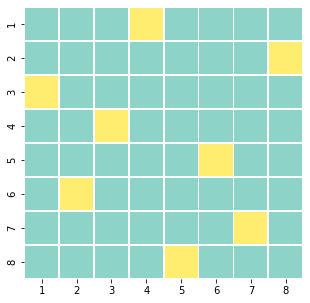

In [3]:

initial_state = [2, 7, 3, 0, 7, 5, 2, 1]
solution = simple_hill_climbing(initial_state)
print(solution.getCurrentState())
board(solution.getCurrentState())


Before: 5
[1, 7, 3, 0, 7, 2, 2, 5]
After: 4
[4, 7, 3, 0, 7, 2, 2, 5]
Before: 6
[3, 2, 7, 2, 5, 0, 4, 7]
After: 4
[3, 1, 7, 2, 5, 0, 4, 7]
Before: 4
[2, 7, 5, 1, 0, 7, 3, 4]
After: 3
[2, 7, 5, 1, 0, 0, 3, 4]
Before: 8
[0, 7, 1, 5, 0, 4, 2, 3]
After: 6
[0, 6, 1, 5, 0, 4, 2, 3]
Before: 8
[2, 0, 0, 4, 3, 5, 1, 6]
After: 8
[3, 0, 0, 4, 3, 5, 1, 6]
Before: 6
[3, 3, 0, 6, 4, 5, 0, 1]
After: 4
[7, 3, 0, 6, 4, 5, 0, 1]
Before: 3
[4, 6, 0, 0, 5, 1, 7, 3]
After: 2
[4, 6, 0, 2, 5, 1, 7, 3]
Before: 4
[2, 5, 3, 6, 1, 7, 0, 4]
After: 4
[2, 7, 3, 6, 1, 7, 0, 4]
Before: 4
[7, 2, 6, 4, 1, 3, 0, 7]
After: 3
[5, 2, 6, 4, 1, 3, 0, 7]
Before: 5
[7, 6, 0, 2, 5, 4, 3, 1]
After: 5
[7, 6, 0, 3, 5, 4, 3, 1]
Before: 4
[5, 7, 6, 3, 3, 1, 4, 0]
After: 3
[5, 7, 6, 6, 3, 1, 4, 0]
Before: 4
[7, 5, 0, 1, 6, 3, 6, 4]
After: 2
[7, 5, 0, 2, 6, 3, 6, 4]
Before: 5
[2, 6, 0, 3, 5, 6, 4, 7]
After: 5
[4, 6, 0, 3, 5, 6, 4, 7]
Before: 5
[7, 4, 4, 0, 6, 5, 3, 6]
After: 5
[7, 1, 4, 0, 6, 5, 3, 6]
Before: 7
[3, 7, 1, 0, 4, 6, 6, 5]

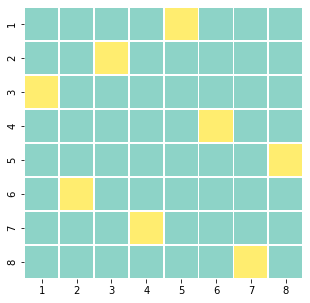

In [4]:
initial_state = [2, 7, 3, 0, 7, 5, 2, 1]
solution = random_restart(initial_state)
print(solution.getCurrentState())
board(solution.getCurrentState())